## <font color="blue">4.1 - Cash Flow: EDA and Data Visualization<font>
---
EDA Post Modeling and post reduced DF


##### <font color="blue">Imports<font>
---

In [2]:
#import libraries

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.ticker as mtick
from tabulate import tabulate
import textwrap
%matplotlib notebook
%matplotlib inline



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [60]:

df = pd.read_parquet('data/cleaned/df_final_2.0.parquet')

In [61]:
df.shape

(14499, 205)

In [62]:
df['target_cfp'].replace({True: 1, False: 0}, inplace=True)

In [63]:
#Percent Columns
df.drop(['percent_under_5_years', 'percent_5_to_9_years', 'percent_10_to_14_years', 'percent_15_to_19_years', 'percent_20_to_24_years', 'percent_25_to_29_years', 'percent_30_to_34_years', 
                'percent_35_to_39_years', 'percent_40_to_44_years', 'percent_45_to_49_years', 'percent_50_to_54_years', 'percent_55_to_59_years', 'percent_60_to_64_years', 'percent_65_to_69_years', 
                'percent_70_to_74_years', 'percent_75_to_79_years', 'percent_80_to_84_years', 'percent_85_years_and_over', 'percent_5_to_14_years', 'percent_15_to_17_years', 'percent_under_18_years', 
                'percent_18_to_24_years', 'percent_15_to_44_years', 'percent_16_years_and_over', 'percent_18_years_and_over', 'percent_21_years_and_over', 'percent_60_years_and_over', 'percent_62_years_and_over', 
                'percent_65_years_and_over', 'percent_male_under_5_years', 'percent_male_5_to_9_years', 'percent_male_10_to_14_years', 'percent_male_15_to_19_years', 'percent_male_20_to_24_years', 
                'percent_male_25_to_29_years', 'percent_male_30_to_34_years', 'percent_male_35_to_39_years', 'percent_male_40_to_44_years', 'percent_male_45_to_49_years', 'percent_male_50_to_54_years', 
                'percent_male_55_to_59_years', 'percent_male_60_to_64_years', 'percent_male_65_to_69_years', 'percent_male_70_to_74_years', 'percent_male_75_to_79_years', 'percent_male_80_to_84_years', 
                'percent_male_85_years_and_over', 'percent_female_under_5_years', 'percent_female_5_to_9_years', 'percent_female_10_to_14_years', 'percent_female_15_to_19_years', 'percent_female_20_to_24_years', 
                'percent_female_25_to_29_years', 'percent_female__30_to_34_years', 'percent_female_35_to_39_years', 'percent_female__40_to_44_years', 'percent_female_45_to_49_years', 'percent_female_50_to_54_years', 
                'percent_female_55_to_59_years', 'percent_female_60_to_64_years', 'percent_female_65_to_69_years', 'percent_female_70_to_74_years', 'percent_female_75_to_79_years', 'percent_female_80_to_84_years', 
                'percent_female_85_years_and_over'],  axis = 1, inplace=True)

#Population Columns
df.drop(['female_population_under_5_years', 'female_population_5_to_9_years', 'female_population_10_to_14_years', 'female_population__5_to_19_years', 
         'female_population_20_to_24_years', 'female_population_25_to_29_years', 'female_population_30_to_34_years', 'female_population_35_to_39_years', 
         'female_population_40_to_44_years', 'female_population_45_to_49_years', 'female_population_50_to_54_years', 'female_population_55_to_59_years', 
         'female_population_60_to_64_years', 'female_population_65_to_69_years', 'female_population_70_to_74_years', 'female_population_75_to_79_years', 
         'female_population_80_to_84_years', 'female_population_85_years_and_over'], axis = 1, inplace=True)

#Voter Columns
df.drop(['2022_#_precincts', '2022_eligible_to_register', '2022_registered_voters', '2022_precinct_voters', '2022_mail_voters', '2022_total_voters', 
         '2022_%_mail_voters', '2022_turnout_registered', '2022_turnout_eligible'], axis = 1, inplace=True)

#Dropping due to irregularity of over 4 bathrooms in a home
df = df[df.total_bathrooms <= 4]

#These two columns just contained too much of the population
df.drop(['population_18_years_and_over', 'population_21_years_and_over'], axis=1, inplace=True)

#### <font color="blue">Scatters<font>

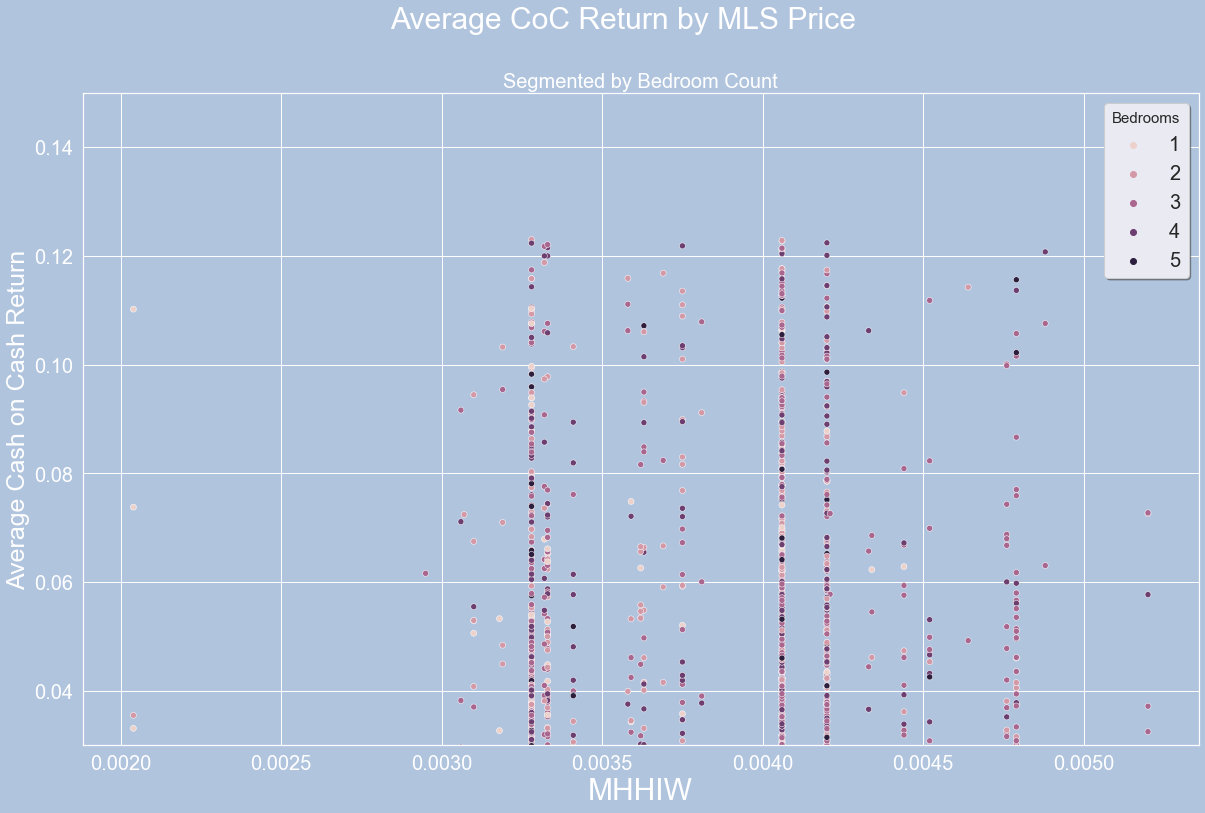

In [89]:
plt.figure(figsize=(20,12))
ax = sns.scatterplot(x='child_dependency_ratio',
                y='avg_coc',
                hue='bedrooms',
                data=df)
plt.ylim(.03, .15)
# plt.xlim(0, 1600000)

plt.suptitle('Average CoC Return by MLS Price', fontsize=30, color='white')
plt.title('Segmented by Bedroom Count', fontsize=20, color='white')
plt.xlabel('MHHIW', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
plt.ticklabel_format(useOffset=False, style='plain')
ax.tick_params(axis='both', colors='white', which='major', labelsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
# fmt = '${x:,.0f}'
# tick = mtick.StrMethodFormatter(fmt)
# ax.xaxis.set_major_formatter(tick)
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.legend(title='Bedrooms', title_fontsize= 15, loc='upper right', shadow=True, fontsize=20)
plt.savefig('Plots/scatter.tcfp.cdr.png',dpi=300, bbox_inches = "tight")
plt.show()



